Name : Parth Kapadia

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [109]:
df = pd.read_excel("/content/DS - Assignment Part 1 data set.xlsx")

In [110]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [111]:
print(len(df))
from scipy import stats
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
print(len(df))

414
407


In [112]:
X = df.drop(['House price of unit area'], axis = 1)
y = df['House price of unit area']

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.05,random_state =123)


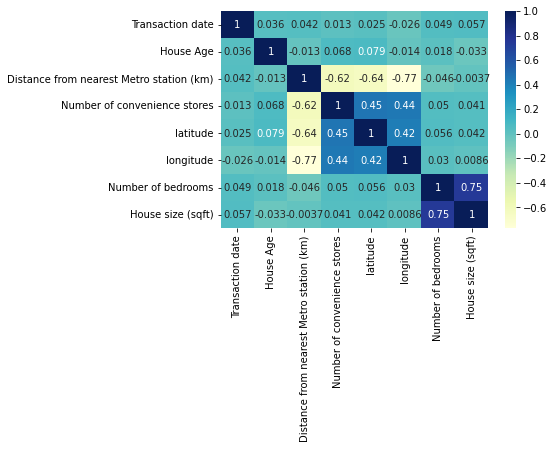

In [114]:
dataplot = sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)

An evidently high correlation exists between the number of bedrooms and the size of the house in sq. ft.
Hence dropping the bedroom column would help is lowering the multicollinearity aspect of the data.

In [115]:
X_train = X_train.drop(['Number of bedrooms'], axis = 1)
X_test = X_test.drop(['Number of bedrooms'], axis = 1)
X = X.drop(['Number of bedrooms'], axis = 1)

# Fitting basic regression models 


1. Linear Regression



a. Ordinary Least Squares



In [116]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.6136643015859947
0.6524704328360402


**It fails to fit complex data well, due to the assumption of a linear relationship throughout the data.**

b. Polynomial Regression

In [117]:
#fitting the polynomial regression model to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X_train)
X_poly_test=poly_reg.fit_transform(X_test) 
poly_reg.fit(X_poly,y_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y_train)
print(lin_reg2.score(X_poly, y_train))
print(lin_reg2.score(X_poly_test, y_test))

0.7412766058891649
0.7172719995893475


The presence of one or two outliers in the data can seriously affect the results of the nonlinear analysis. These are too sensitive to the outliers.

2. Random Forest Regressor

In [118]:
from sklearn.ensemble import RandomForestRegressor

train_r2 = []
test_r2 = []

for i in range(1, 21):
  md = RandomForestRegressor(max_features = 'sqrt', max_depth =  i, bootstrap = True, random_state=42)
  md.fit(X_train, y_train)
  train_r2.append(md.score(X_train, y_train))
  test_r2.append(md.score(X_test, y_test))

In [119]:
print(train_r2, test_r2)

[0.49429000141537904, 0.6489120457731601, 0.7300282058711619, 0.7841740141927758, 0.8251550781610416, 0.872197441851689, 0.9023913336808017, 0.9281893466233057, 0.9402931953033327, 0.9498248324007093, 0.9563237146956151, 0.960626511663852, 0.9609773750103185, 0.9617410646744695, 0.9626097821379678, 0.9629787176301018, 0.9628399682380853, 0.9630193638813999, 0.9627894772852369, 0.9630890751391084] [0.46342449801423613, 0.6395568360715153, 0.7321430967899054, 0.8108751812914717, 0.8374994273868073, 0.8832400111390342, 0.9038643897904349, 0.9105041893663722, 0.92716601782727, 0.9125022702211689, 0.9234176691728169, 0.9188274815774736, 0.9181998400782301, 0.9138018636544883, 0.9081617422143797, 0.9085526077618934, 0.9094220867063024, 0.9032115855530064, 0.9066409231396749, 0.9075821535993268]


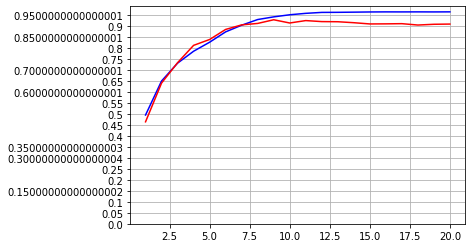

In [120]:
import matplotlib.pyplot as plt

rng = [i for i in range(1, 21)]
plt.plot(rng, train_r2, color='b')
plt.plot(rng, test_r2, color='r')
plt.yticks(np.arange(0, 1, 0.05),
           np.arange(0, 1, 0.05))
plt.grid(True)
plt.show()

**The issue with the random forest regressor is that it does not extrapolate.**

That is, for predictions related to values changing over time, such as stock or house prices(as is our case), it will limit it's output to within an approximate range that it has observed within the training set.

A possible solution is to feed input data as it is ingested for training, but the possibilty of making an error for unseen data values remains a possibility.



3. AdaBoost

In [121]:
from sklearn.ensemble import AdaBoostRegressor

ada_regr = AdaBoostRegressor(n_estimators=200, learning_rate = 2, random_state=42)
ada_regr.fit(X_train, y_train)
print(ada_regr.score(X_train, y_train))
print(ada_regr.score(X_test, y_test))

0.81127404313738
0.8288770284490077


**A limitation for the AdaBoost algorithm is that it needs clean data, it does not perform well on data that has outliers.**

4. XGBoost

In [122]:
import xgboost
xgb_model = xgboost.XGBRegressor(n_estimators=65, max_depth=4, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)
print(xgb_model.score(X_train, y_train))
print(xgb_model.score(X_test, y_test))

[14:32:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9349475688235644
0.9241466003286701


**The problem with XgBoost is the same as Random Forest, it doesn't extrapolate well.**

Another issue is that it takes up a lot of time, as a trade off for the higher accuracy.

5. LightGBM

In [133]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
import lightgbm

lgbm = lightgbm.LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train))
print(lgbm.score(X_train, y_train))

0.9377148839091933
0.9377148839091933


It tends to overfit small datasets, and is sensitive to outliers.

# Final Model Selection

**The best algorithm out of the above ones can be said to be LightGBM, due to it not overfitting, which is it's main weakness.**